In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/datasets_house_prices.csv')

In [4]:
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [5]:
print(data.isnull().sum())


Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [19]:
data['Size (sqft)'] = (data['Size (sqft)'] - data['Size (sqft)'].min()) / (data['Size (sqft)'].max() - data['Size (sqft)'].min())
data['Bedrooms'] = (data['Bedrooms'] - data['Bedrooms'].min()) / (data['Bedrooms'].max() - data['Bedrooms'].min())
data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

In [20]:
import numpy as np

In [24]:
X = data[['Size (sqft)', 'Bedrooms', 'Age']].values
X = np.c_[np.ones(X.shape[0]), X]  # Add ones column for intercept
y = data['Price'].values

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f"Coefficients: {theta}")

Coefficients: [230359.81519391 959690.20271217  19163.6461528  -20411.76938653]


In [25]:
def predict_price(size, bedrooms, age, theta):
    return theta[0] + theta[1]*Size (sqft) + theta[2]*Bedrooms + theta[3]*Age

In [26]:
split_index = int(0.8 * len(data))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [27]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)



In [28]:
y_train_pred = X_train.dot(theta)

In [29]:
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {mse_train}")

Training MSE: 168931314.87644464


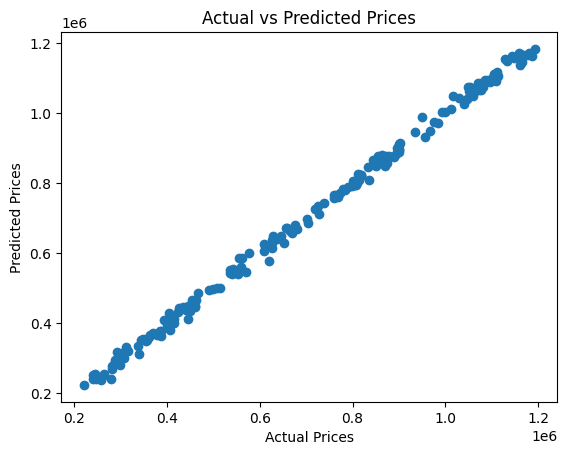

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()